<a id="title"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:110%; font-family:Arial; background-color:#666666; overflow:hidden"><b> What Do Your Blood Sugars Tell You? </b></div>

<img src="blood-sugars.jpg" alt="Diabetes" width = "1600px">

<a id="exec_sum"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:110%; font-family:Arial; background-color:#666666; overflow:hidden"><b> Executive Summary </b></div>

### Competition Overview
Diabetes mellitus remains a global health issue, causing several thousand people to die each day from this single condition. Finding and avoiding diabetes in the earlier stages can help reduce the risk of serious health issues such as circulatory system diseases, kidney malfunction, and vision loss. 

This competition involves developing a predictive model for effectively detecting potential diabetes cases, ideally, before commencing preventive treatment.

<br>

### Dataset
The dataset contains diagnostic measurements that are associated with diabetes, which were collected from a population of Pima Indian women. The data includes various medical and demographic attributes, making it a well-rounded resource for predictive modeling. The columns and data types are as follows:

**Features:**
- **Pregnancies**: Numerical (Continuous); Number of times the patient has been pregnant.
- **Glucose**: Numerical (Continuous); Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
- **BloodPressure**: Numerical (Continuous); Diastolic blood pressure (mm Hg).
- **SkinThickness**: Numerical (Continuous); Triceps skinfold thickness (mm).
- **Insulin**: Numerical (Continuous); 2-Hour serum insulin (mu U/ml).
- **BMI**: Numerical (Continuous); Body mass index (weight in kg/(height in m)^2).
- **DiabetesPedigreeFunction**: Numerical (Continuous); A function that represents the likelihood of diabetes based on family history.
- **Age**: Numerical (Continuous); Age of the patient in years.

**Target:**
- **Outcome**: Categorical (Binary); Class variable (0 or 1) indicating whether the patient is diagnosed with diabetes. 1 = Yes, 0 = No.

<br>

### Findings

#### Identifying key features in the dataset

Two initial models were built using all of the dataset features: a simple **Random Forest classifier** and a **Logistic Regression classifier with Lasso regularization**. Each model has its own way of handling data and evaluating feature importance, thus leading to different results. In our trial case, the top-3 most important features were identical: **Glucose**, **BMI**, and **Age**. Such consistency signals that these features are important predictors of diabetes.

<div class = 'container'>
    <img src="rf_importance.png" width = "600px">
    <img src="lasso_importance.png" width = "600px">
</div>

For features that appear moderately important in one model, such as pregnancies in the logistic regression model, the likely explanation is the model's handling of linear relationships.

To reconcile, SHAP analysis was performed to deliver a unified approach to explain individual predictions and understand the global importance of each feature. The results from the analysis again showed that **Glucose**, **BMI**, and **Age** were the most important features explaining diabetes outcome. The other features were dropped from the final model.


<div class="container">
    <img src="shap_summary.png" width="800px">
    <div class = "text"></div>
</div>


#### Most Important Predictors of diabetes outcome
With the aforementioned feature importance analysis as our basis, **Glucose**, **BMI**, and **Age** were selected as the most significant features influencing the model's predictions of diabetes. High values in these features are strongly associated with an increased likelihood of diabetes.

#### Moderate Predictors
Features such as **insulin**, **the number of pregnancies** and **diabetes pedigree function** show some influence on diabetes outcome but are less impactful compared to the top features. Morever, some relationships exhibit strong positive correlation, such as number of pregnancies with age, or insulin with glucose; the weaker feature should be removed to reduce risk of multicollinearity.

<br>

#### Relationship between diabetes and key predictors: Glucose, BMI, and Age
<img src="pairplot.png" alt="pairplot">

**Glucose vs. BMI**:
Higher glucose levels are more commonly associated with diabetic individuals. While there is some overlap, non-diabetic individuals tend to have lower glucose levels.

**Glucose vs. Age**:
Age does not show a clear pattern of differentiation for diabetes in this plot. Both diabetic and non-diabetic groups span a wide range of ages, indicating that while age is a factor, glucose levels are a stronger indicator of diabetes in this dataset.

**BMI vs. Age**:
This suggests that BMI alone may not be a strong differentiator for diabetes when considered in combination with age. However, based on the results of the feature importance analysis, both BMI and age contribute to the overall risk profile.

<br>

### Model Building

Using the elected key features of **Glucose**, **BMI**, and **Age**, we evaluated five different classification algorithms using 5-fold cross validation. 

We selected the model that achieved the highest mean F1-score with reasonable variance to ensure consistent performance across different folds. F1-score was the benchmark scoring standard because it balances model precision and recall. The best performing model was the **Support Vector Machine (SVM)** classifier. The model weights were tuned to achieve optimal performance. The best model weights were ultimately the default weights.

<br>

### Risk Assessment
#### Assessing Diabetes Risk Using Best Model

With our trained SVM model on hand, we estimated the of a person of **Age 54**, **height 178 cm**, **weight 96 kg**, and **glucose levels of 125 mg/dL** getting diabetes. 

<img src="input_entry2.png" width = "1800px">


The model predicts that **the probability of such person having diabetes is about 62%**, **an elevated risk**. This model signals to such person that a visit to a clinic for a check-up is imperative and that increased attention should be devoted toward behaviorial and diet modification.

<a id="1"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:110%; font-family:Arial; background-color:#666666; overflow:hidden"><b> Table of Contents </b></div>

- <a href="#imports">1. Importing Required Libraries</a>
- <a href="#reading_data">2. Reading and Understanding our Data</a>
- <a href="#data_processing">3. Data Processing & Preliminary EDA</a>
- <a href="#initial_model">4. Initial Model Building for Feature Importance </a>
- <a href="#feature_reconciliation">5. Feature Importance Reconciliation</a>
- <a href="#eda_key_features">6. Exploratory Data Analysis of Key Features </a>
- <a href="#model_building">7. Model Building </a>
- <a href="#risk">8. Assessing Diabetes Risk Using Best Model</a>
- <a href="#conclusion">9. Conclusion </a>

<a id="imports"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:110%; font-family:Arial; background-color:#666666; overflow:hidden"><b> 1. Importing Required Libraries </b></div>

In [1]:
# core libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style('whitegrid')

# sklearn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, make_scorer, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.offline as pyo

# other
import shap
from itertools import combinations

# helpers
import helpers as h

# warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

%load_ext autoreload
%autoreload 2

<a id="reading_data"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:110%; font-family:Arial; background-color:#666666; overflow:hidden"><b> 2. Reading Data </b></div>

In [2]:
# import dataset
data = pd.read_csv('data/diabetes.csv')
print(f"The dataset comprises {data.shape[0]} observations, {data.shape[1] - 1} features, and 1 target column")

The dataset comprises 768 observations, 8 features, and 1 target column


In [3]:
# show first 5 rows
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
# evaluate feature type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# check for missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# review dataset for outliers and zero values
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

#### Commentary on initial dataset import
- Each column of the dataset is formatted properly as type numeric
- There are no null instances
- There are clear instances of incorrect data entry in columns: Glucose, BloodPressure, SkinThickness, Insulin, and BMI. This will be rectified in the next stage. All zero instance values will be replaced with the column median.

<a id="data_processing"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:110%; font-family:Arial; background-color:#666666; overflow:hidden"><b> 3. Data Processing & Preliminary EDA </b></div>

### Handling zero values

As mentioned, there are zero instances for columns: Glucose, BloodPressure, SkinThickness, Insulin, and BMI. Rather than throw out these 376 entries entirely because of data incompleteness, which would account for nearly half of our data, the column median was applied as a replacement.

In [7]:
df = data.copy()
mask1 = df['Glucose'] == 0
mask2 = df['BloodPressure'] == 0
mask3 = df['SkinThickness'] == 0
mask4 = df['Insulin'] == 0
mask5 = df['BMI'] == 0
df = df[mask1 | mask2 | mask3 | mask4 | mask5]

print(f"There are {df.shape[0]} zero-value instances, accounting for {df.shape[0] / data.shape[0] * 100:.2f}% of the dataset")

There are 376 zero-value instances, accounting for 48.96% of the dataset


In [8]:
# correct for zero value instances
df = data.copy()

# Replace zero values with the median for specified columns
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Loop through each column and replace zero values with the column's median
for col in columns_to_replace:
    median_value = df[df[col] != 0][col].median()  # Calculate the median value from existing non-zero instances
    df[col] = df[col].replace(0, median_value)  # Replace zeros with the median value

df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.300000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

### Distribution Plots

**1. Pregnancies**
  - Most individuals, both diabetic and non-diabetic, have had fewer than 5 pregnancies.
  - Diabetic cases (orange) appear more frequently as the number of pregnancies increases, especially beyond 5 pregnancies, suggesting a possible association between a higher number of pregnancies and an increased risk of diabetes.

**2. Glucose**
  - There is a noticeable difference between diabetic and non-diabetic groups. Non-diabetic individuals (blue) have glucose levels that peak around 100 mg/dL, while diabetic individuals (orange) show a higher frequency in glucose levels above 120 mg/dL.
  - This significant shift in glucose levels indicates that higher glucose concentrations are strongly associated with diabetes.

**3. BloodPressure**
  - Both diabetic and non-diabetic groups have a similar distribution with peaks around 70-80 mm Hg, indicating less distinct separation based on blood pressure alone.
  - The overlap suggests that diastolic blood pressure may not be as strong a standalone predictor of diabetes as glucose levels.

**4. SkinThickness**
  - Most values are concentrated between 0 and 40 mm for both groups, with a significant overlap.
  - Diabetic cases (orange) are slightly more common at higher skin thickness values, but the distinction is not pronounced, indicating limited predictive power.

**5. Insulin**
  - There is a high concentration of individuals with low insulin levels (close to zero) in both groups.
  - For values above 200 mu U/ml, diabetic cases become more frequent, indicating a possible link between high insulin levels and diabetes. However, the data is skewed with many low values, suggesting measurement challenges or variability.

**6. BMI (Body Mass Index)**
  - Both groups peak around a BMI of 30, but diabetic cases (orange) are more common as BMI increases beyond this point.
  - The overlap is significant, but there is still a clear trend where higher BMI values are associated with a greater likelihood of diabetes.

**7. DiabetesPedigreeFunction**
  - The majority of both diabetic and non-diabetic individuals have low pedigree function values (below 1.0).
  - Diabetic cases (orange) appear more frequently at higher pedigree scores, suggesting that a higher genetic predisposition may be linked to an increased risk of diabetes, albeit with considerable overlap.

**8. Age**
  - Both groups peak at younger ages (20-30 years), with diabetic cases (orange) becoming more frequent at older ages (40 years and above).
  - There is a trend where increasing age is associated with a higher frequency of diabetes, reflecting the known risk factor of aging.

**9. Outcome**
  - There are more non-diabetic (0) cases than diabetic (1) cases in the dataset, reflecting the class imbalance commonly found in health datasets.
  - The imbalance suggests a need for careful handling when building predictive models to ensure balanced performance.

#### Histograms

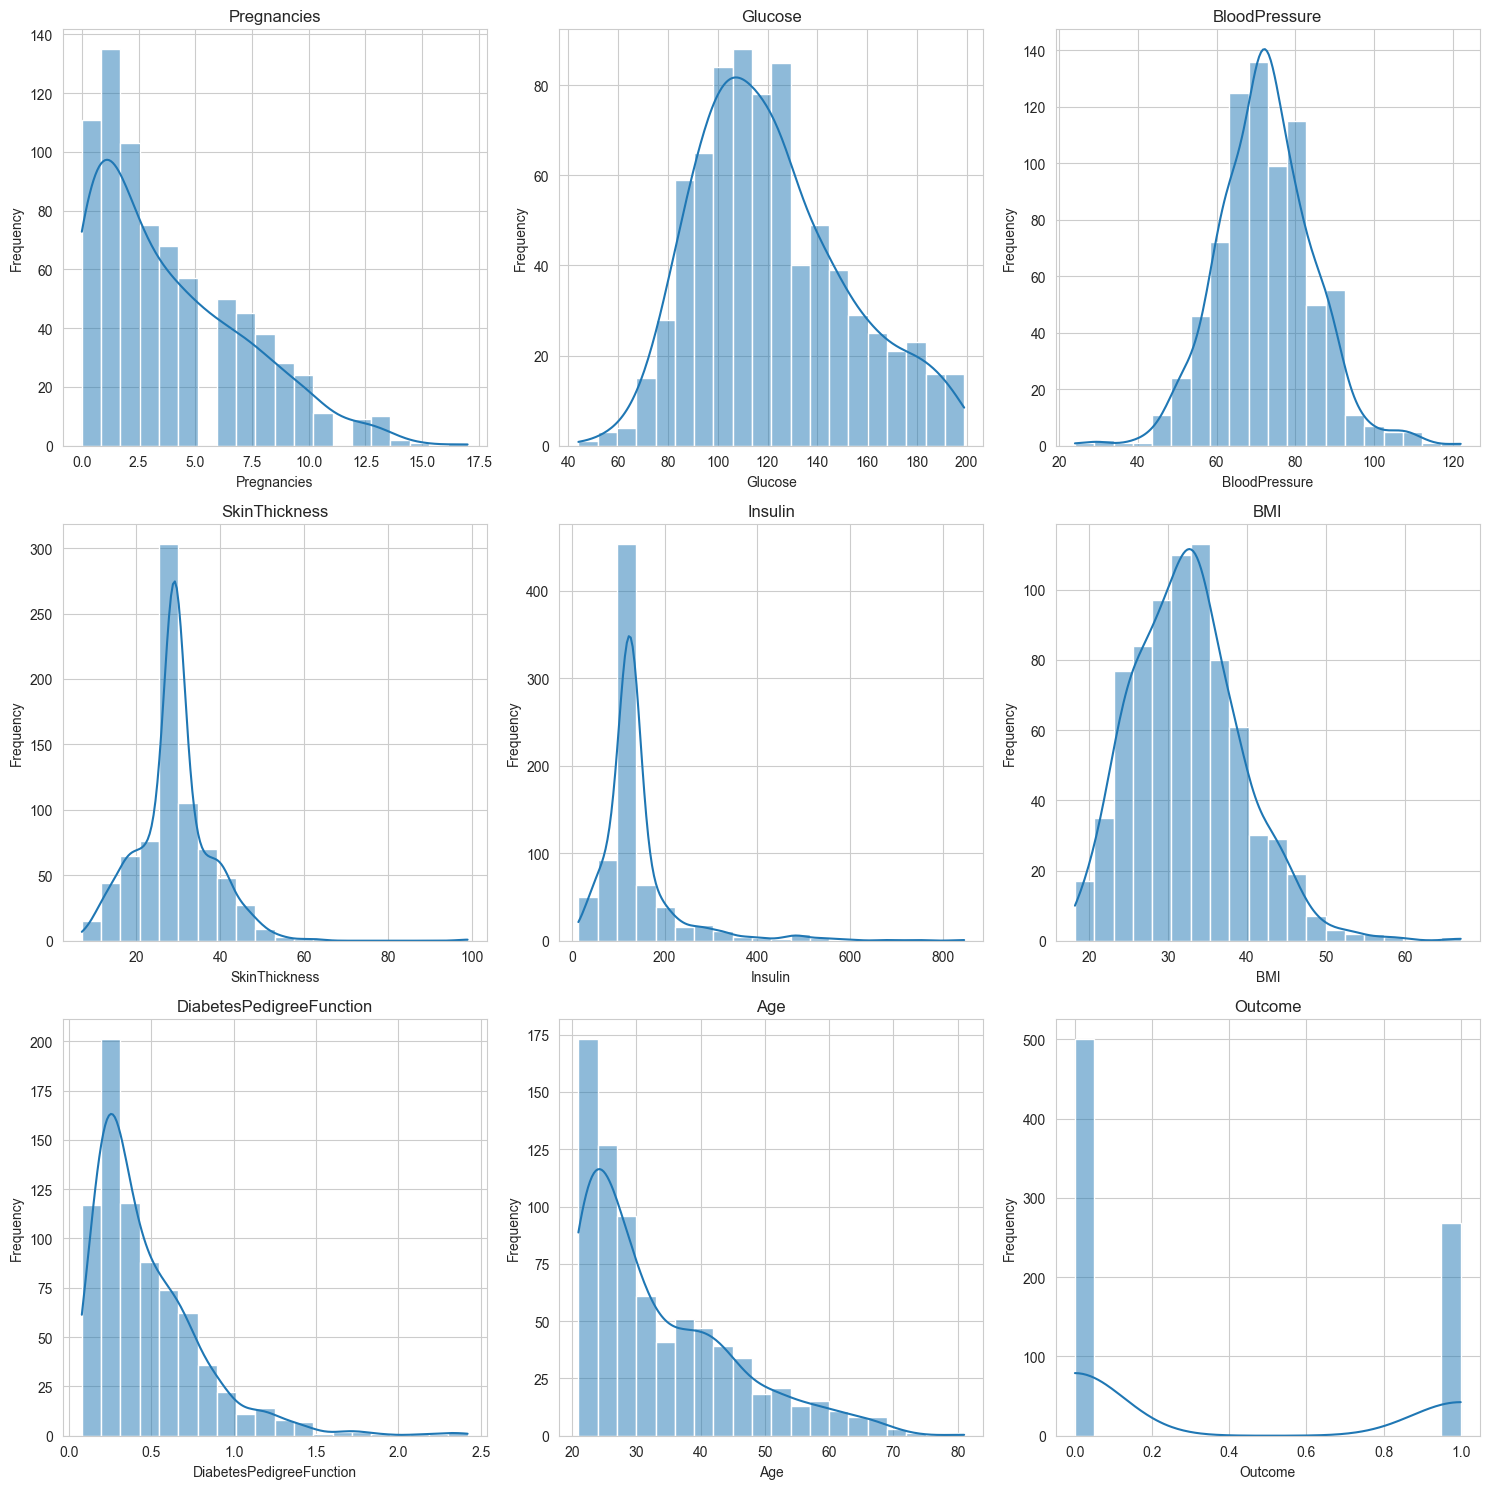

In [9]:
# List of all columns to visualize
columns_to_visualize = df.columns

# Set up the 3x3 plot grid
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()  # Flatten the 3x3 array of axes

# Iterate through each column and create a histogram
for i, col in enumerate(columns_to_visualize):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=20, line_kws={'color': 'red'})
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots (if less than 9 columns)
for j in range(i + 1, 9):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

#### Boxplots

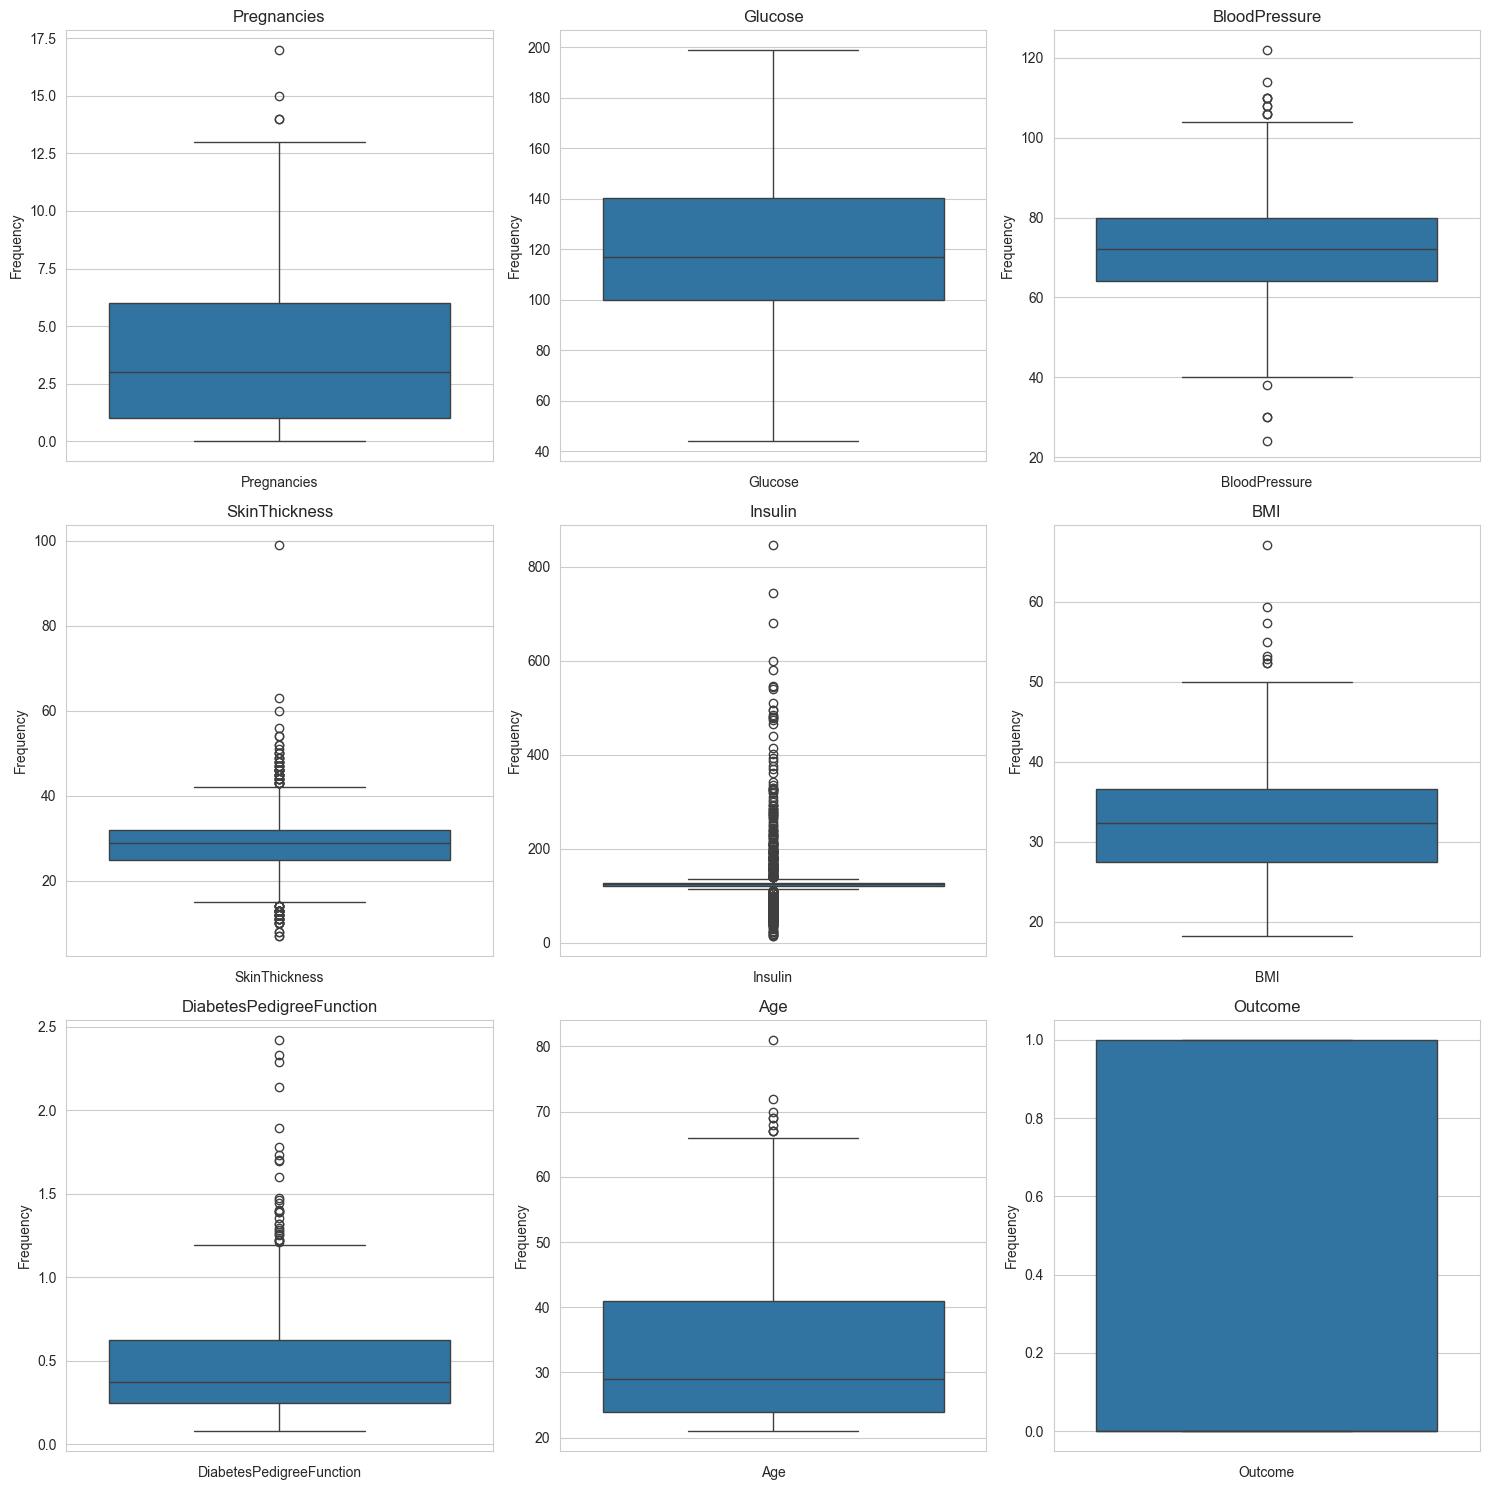

In [10]:
# List of all columns to visualize
columns_to_visualize = df.columns

# Set up the 3x3 plot grid
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()  # Flatten the 3x3 array of axes

# Iterate through each column and create a histogram
for i, col in enumerate(columns_to_visualize):
    sns.boxplot(df[col], ax = axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots (if less than 9 columns)
for j in range(i + 1, 9):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### Distribution based on Diabetes Outcome

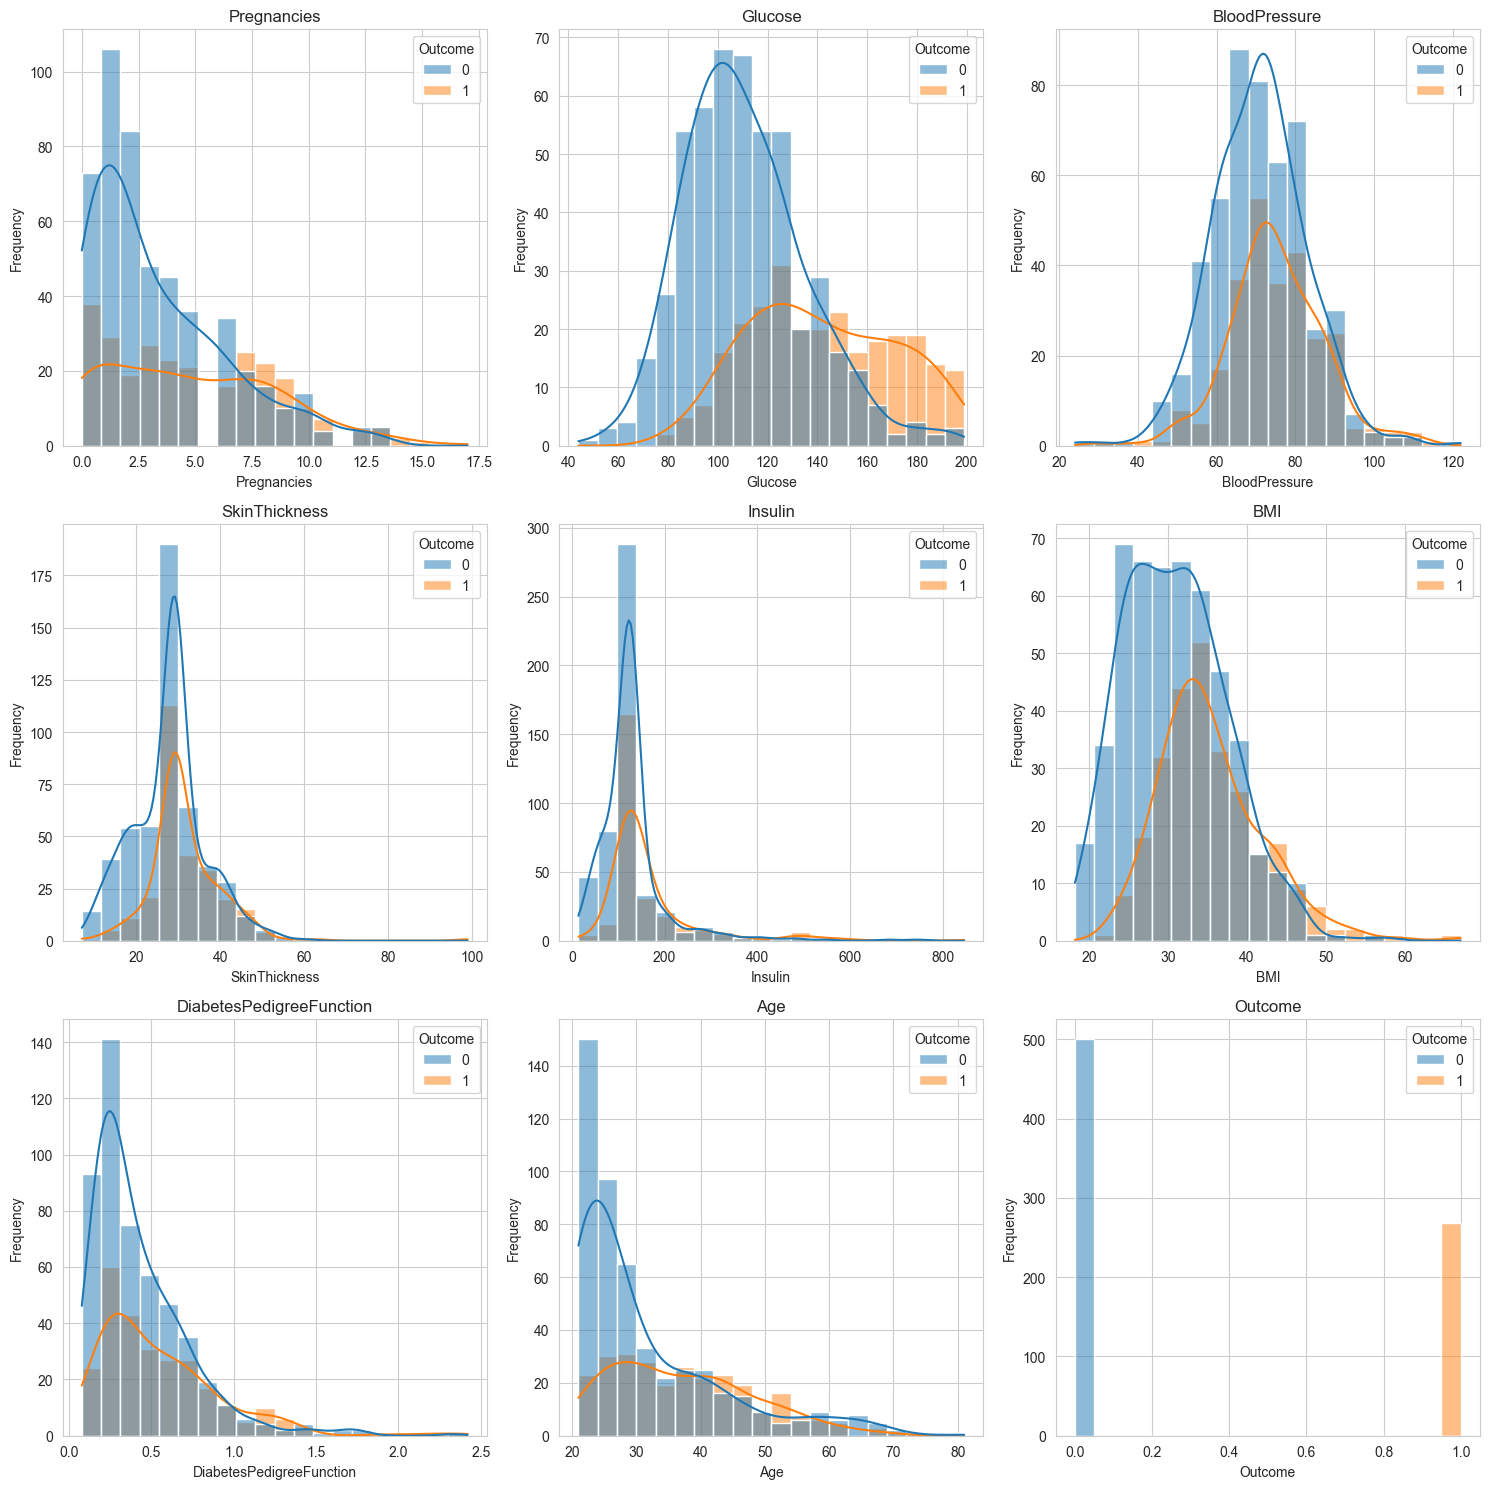

In [11]:
# List of all columns to visualize
columns_to_visualize = df.columns

# Set up the 3x3 plot grid
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()  # Flatten the 3x3 array of axes

# Iterate through each column and create a histogram
for i, col in enumerate(columns_to_visualize):
    sns.histplot(df, x = col, hue = 'Outcome', kde=True, ax=axes[i],  bins=20)
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots (if less than 9 columns)
for j in range(i + 1, 9):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

<a id="initial_model"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:110%; font-family:Arial; background-color:#666666; overflow:hidden"><b> 4. Initial Model Training </b></div>

### Scale and Split Data

In [12]:
model_results = []

# split the dataset
df1 = df.copy()

X = df1.drop('Outcome', axis = 1)
y = df1['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# (Optional) Convert scaled data back to DataFrame for easier understanding
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

### Model 1: Random Forest

#### Feature Importance Summary:

`Key Predictors` 

**Glucose levels**, **BMI**, **age**, and family history (**DiabetesPedigreeFunction**) are the most critical factors in predicting diabetes outcomes. These should be the primary focus when developing predictive models and designing preventive healthcare strategies.

- **Glucose**: This feature remains the most critical predictor of diabetes, with the highest importance score. It indicates that plasma glucose concentration is the most significant factor in determining the likelihood of diabetes.
- **BMI (Body Mass Index)**: BMI is the second most important feature. This result highlights the strong association between body weight relative to height and diabetes risk, reinforcing the link between obesity and diabetes.
- **Age**: Age ranks as the third most important feature, showing that older age increases the risk of developing diabetes. This aligns with the general understanding that the likelihood of diabetes increases with age.
- **DiabetesPedigreeFunction**: This feature, representing the genetic predisposition to diabetes, is also quite important. It suggests that a family history of diabetes plays a significant role in an individual's risk profile.


`Less Impactful Features`

While still relevant, features like blood pressure, number of pregnancies, skin thickness, and insulin levels contribute less to the model’s predictions. They might still provide useful information but are not as influential as the top predictors.

- **BloodPressure**: While less critical than glucose and BMI, blood pressure still holds some importance. This might reflect the relationship between hypertension and metabolic syndromes, including diabetes.
- **Pregnancies**: The number of times a patient has been pregnant shows moderate importance. This could be associated with gestational diabetes or other pregnancy-related metabolic changes.
- **SkinThickness** and **Insulin**: These features have relatively lower importance scores. Although they are part of the diagnostic measurements, their predictive power for diabetes is less compared to glucose, BMI, and age.

In [13]:
# Step 1: Train the Random Forest Model
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100, 
    class_weight='balanced',
    random_state=42
)

# Train the model using the scaled training data
rf_model.fit(X_train_scaled, y_train)

# Step 2: Evaluate Model Performance
# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

result = {}
result['Model'] = 'Random Forest'
result['Accuracy'] = accuracy
result['Precision'] = precision
result['Recall'] = recall
result['F1'] = f1

model_results.append(result)
pd.DataFrame(model_results)

Model  Accuracy  Precision  Recall        F1
0  Random Forest  0.753247    0.64557  0.6375  0.641509

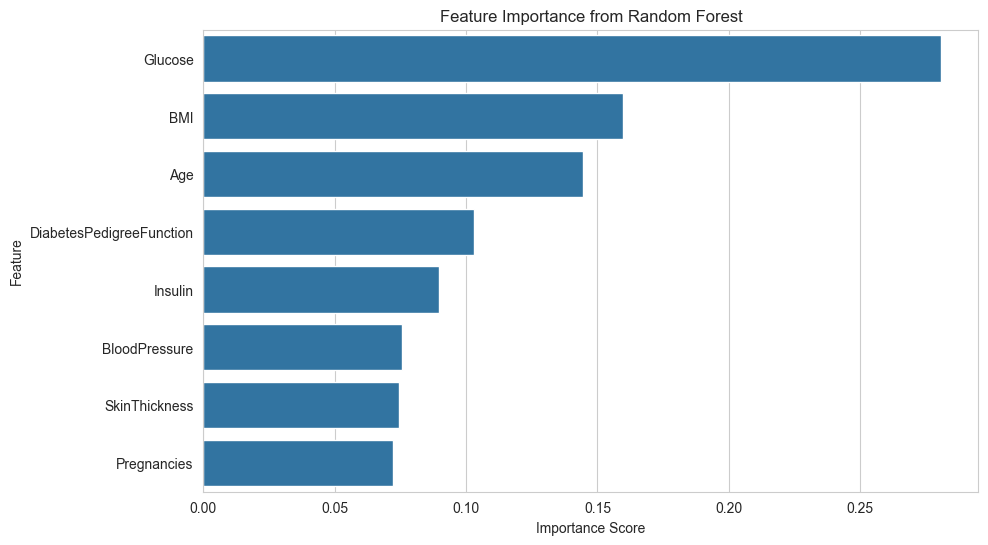

In [14]:
# Step 3: Feature Importance Analysis
# Get feature importances from the trained Random Forest model
feature_importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

### Model 2: Logistic Regression with Lasso

`Key Predictors`

**Glucose levels** and **BMI** are the most critical factors for predicting diabetes, highlighting the importance of these clinical measurements in assessing diabetes risk.

- **Glucose** has the highest importance score, significantly higher than any other feature. This suggests that glucose levels are the most critical predictor of diabetes in this dataset. Elevated glucose levels are strongly associated with the likelihood of diabetes. This finding aligns with medical knowledge that high blood glucose is a hallmark of diabetes, making it a primary factor for prediction.

- **BMI** is the second most important feature after glucose. The high importance score indicates that BMI is a strong predictor of diabetes. Higher BMI values, which reflect excess body fat, are associated with an increased risk of diabetes. This supports the understanding that obesity is a major risk factor for developing diabetes.

`Secondary Predictors` 

**Age**, **number of pregnancies**, and **insulin levels** also contribute to diabetes prediction, albeit with less influence.

- **Age** is the third most important feature. Its moderate importance score suggests that age plays a significant role in diabetes risk, though not as strongly as glucose or BMI. Older individuals have a higher likelihood of developing diabetes, which is consistent with the fact that the risk of diabetes increases with age due to various factors like reduced insulin sensitivity and lifestyle changes over time.

- The **number of pregnancies** has a moderate importance score. This indicates that pregnancy history is associated with diabetes risk. The link between multiple pregnancies and increased diabetes risk may be related to factors such as gestational diabetes, which can be a precursor to type 2 diabetes later in life.

- **Insulin** has a lower importance score compared to glucose, BMI, and age but is still relevant. Insulin levels are indicative of how the body regulates blood sugar, and abnormalities in insulin production or function can signal diabetes. However, its predictive power is less compared to glucose directly.

`Less Important Features`

Features such as **blood pressure**, **diabetes pedigree function**, and **skin thickness** have minimal predictive power in this logistic regression model, suggesting that other factors may provide more relevant information for diabetes prediction.

- The **diabetes pedigree function** shows relatively low importance, indicating a weaker but still present association with diabetes. While genetic predisposition (as captured by this feature) contributes to diabetes risk, its effect is less pronounced compared to other factors like glucose and BMI.

- **Blood pressure** has a low importance score, suggesting that it is not a strong predictor of diabetes in this dataset. Although high blood pressure is often linked with metabolic syndromes, its direct predictive power for diabetes alone is limited in this context.

- **Skin thickness** has the lowest importance score and is likely not a significant predictor of diabetes in this model. While skinfold thickness is related to body fat, it appears less critical in predicting diabetes compared to BMI or glucose levels.

In [15]:
# Logistic Regression with Lasso regularization
lasso = LogisticRegression(
    penalty='l1', 
    solver='saga', 
    class_weight='balanced',
    max_iter=5000, 
    random_state=42)
lasso.fit(X_train_scaled, y_train)

# Step 2: Evaluate Model Performance
# Make predictions on the test set
y_pred = lasso.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

result = {}
result['Model'] = 'Logistic Regression (with Lasso)'
result['Accuracy'] = accuracy
result['Precision'] = precision
result['Recall'] = recall
result['F1'] = f1

model_results.append(result)
pd.DataFrame(model_results)

Model  Accuracy  Precision  Recall        F1
0                     Random Forest  0.753247    0.64557  0.6375  0.641509
1  Logistic Regression (with Lasso)  0.705628    0.56383  0.6625  0.609195

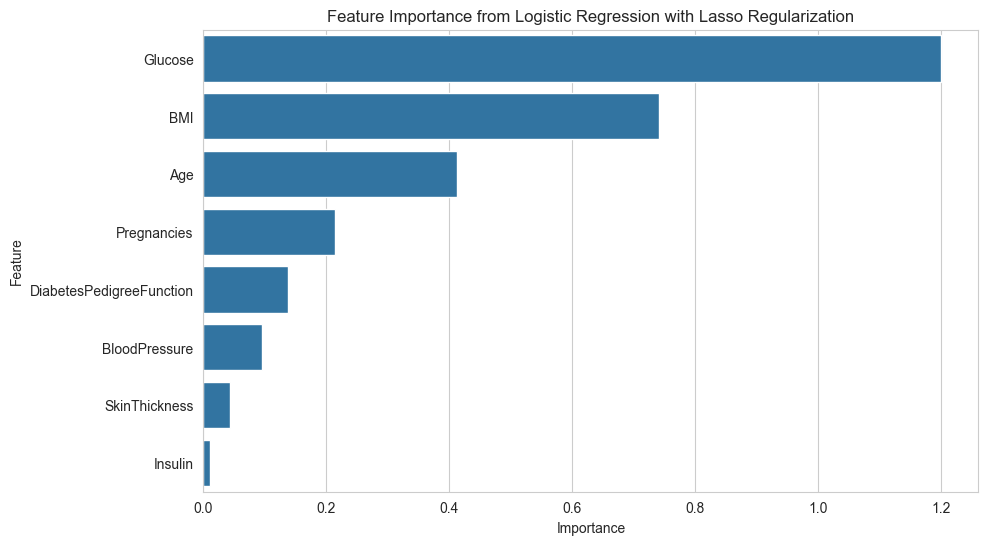

In [16]:
# Get feature importance (coefficients) from Lasso
feature_importance_lasso = abs(lasso.coef_[0])
feature_names = X.columns

# Create a DataFrame for visualization
lasso_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance_lasso})
lasso_importance_df = lasso_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=lasso_importance_df)
plt.title('Feature Importance from Logistic Regression with Lasso Regularization')
plt.show()

<a id="feature_reconciliation"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:110%; font-family:Arial; background-color:#666666; overflow:hidden"><b> 5. Feature Importance Reconciliation </b></div>

Features such as **Glucose**, **BMI**, and **Age** being highly ranked in both models suggest they are consistently important predictors of diabetes.
Differences may occur in features with moderate importance (e.g., Diabetes Pedigree Function, Insulin Pregnancies). These differences might be due to the model’s handling of interactions or linear relationships.

To reconcile this, SHAP analysis was performed to deliver a unified approach to explain individual predictions.

In [17]:
imp_df = features_df.reset_index(drop = True).reset_index()
imp_df['random_forest_rank'] = imp_df['index'].apply(lambda x: x + 1)


lass_imp_df = lasso_importance_df.reset_index(drop = True).reset_index()
lass_imp_df['lasso_rank'] = lass_imp_df['index'].apply(lambda x: x + 1)

pd.merge(imp_df[['Feature','random_forest_rank']], lass_imp_df[['Feature','lasso_rank']], on = 'Feature')

Feature  random_forest_rank  lasso_rank
0                   Glucose                   1           1
1                       BMI                   2           2
2                       Age                   3           3
3  DiabetesPedigreeFunction                   4           5
4                   Insulin                   5           8
5             BloodPressure                   6           6
6             SkinThickness                   7           7
7               Pregnancies                   8           4

In [18]:
# Compare the top features identified by Random Forest and Lasso
rf_top_features = features_df['Feature'][:4].values
lasso_top_features = lasso_importance_df['Feature'][:4].values

# Find common features
common_features = set(rf_top_features).intersection(set(lasso_top_features))
print("Common Features:", common_features)

# Find unique features to each model
unique_to_rf = set(rf_top_features) - set(lasso_top_features)
unique_to_lasso = set(lasso_top_features) - set(rf_top_features)
print("Unique to Random Forest:", unique_to_rf)
print("Unique to Lasso:", unique_to_lasso)


Common Features: {'Glucose', 'BMI', 'Age'}
Unique to Random Forest: {'DiabetesPedigreeFunction'}
Unique to Lasso: {'Pregnancies'}


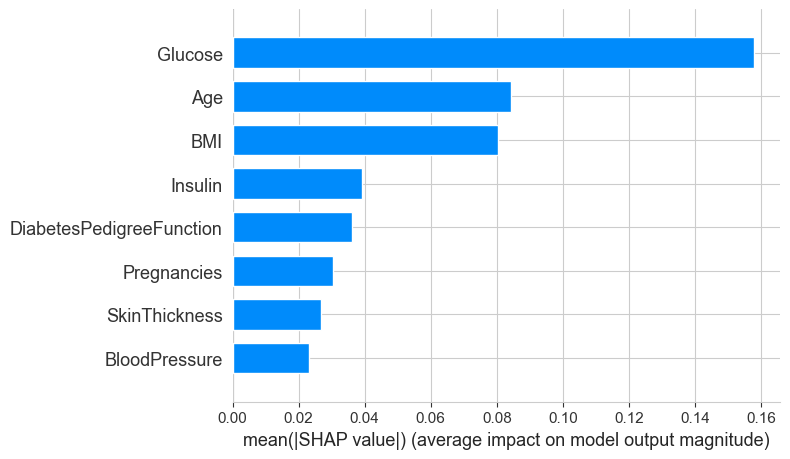

In [19]:
# Assuming model is trained (rf_model) and scaler is used on data
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_train_scaled)

# SHAP summary plot
shap.summary_plot(shap_values[:, :, 1], X_train_scaled_df, plot_type="bar", feature_names=X.columns)

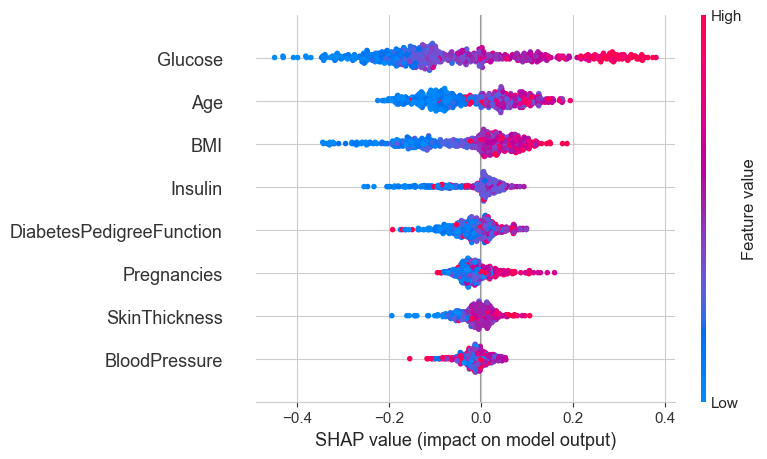

In [20]:
# Step 6: Initialize SHAP Explainer and Calculate SHAP Values
# Use TreeExplainer for tree-based models like Random Forest
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_train_scaled)

# Step 7: SHAP Summary Plot (Global Feature Importance)
# This plot shows the impact of each feature on the model's output
shap.summary_plot(shap_values[:, :, 1], X_train_scaled, feature_names=X.columns)

1. **Glucose**
Glucose is the most critical feature, as indicated by its position at the top of the plot and the wide distribution of SHAP values. Higher glucose levels (represented by pink/red points) are associated with higher SHAP values, indicating a strong positive impact on the likelihood of predicting diabetes. Low glucose levels (blue points) generally have a negative or minimal impact on the model output.

2. **BMI (Body Mass Index)**
BMI is the second most important feature in the model. Higher BMI values (red points) are associated with positive SHAP values, suggesting an increased risk of diabetes. Conversely, lower BMI values (blue points) have a negative or neutral impact on predicting diabetes.

3. **Age**
Age ranks as the third most important feature. Older age (red points) tends to have a positive impact on the model's prediction of diabetes. The spread of SHAP values indicates that age significantly affects the model's output, with higher age values leading to higher predictions of diabetes risk.

4. **Pregnancies**
The number of pregnancies shows moderate importance. A higher number of pregnancies (red points) has a slight positive impact on the likelihood of diabetes, but the overall effect is less pronounced than glucose or BMI. The SHAP values are more centered around zero, indicating less variability in its impact.

5. **DiabetesPedigreeFunction**
This feature shows moderate importance, similar to pregnancies. Higher values (red points) of the diabetes pedigree function, which indicates genetic predisposition, have a positive SHAP value, suggesting a higher risk of diabetes. However, the impact is relatively modest compared to glucose or BMI.

6. **Insulin**
Insulin levels show lower importance compared to the top features. There is a mixed impact on the model output. High insulin values (red points) have both positive and negative SHAP values, indicating some variability in how insulin influences diabetes risk.

7. **BloodPressure**
Blood pressure has low importance, as shown by its position near the bottom of the plot. Both high and low values of blood pressure have a minimal impact on the model output, with SHAP values close to zero. This suggests that blood pressure alone is not a strong predictor of diabetes in this model.

8. **SkinThickness**
Skin thickness has the least importance, reflected in its position at the bottom and narrow distribution of SHAP values. The impact of skin thickness on the model's predictions is negligible, as indicated by the SHAP values being close to zero for most observations. It shows little to no differentiation between high and low values regarding diabetes prediction.



### Correlation Analysis

The correlation heatmap visualizes the pairwise Pearson correlation coefficients between the key features: `Glucose`, `BMI`, `Age`, `DiabetesPedigreeFunction`, and `Pregnancies`.
Correlation coefficients range from -1 (perfect negative correlation) to +1 (perfect positive correlation). A value close to 0 indicates little to no linear relationship.


The high correlation (0.54) between `Age` and `Pregnancies` suggests multicollinearity. In predictive modeling, multicollinearity can inflate the variance of coefficient estimates, leading to unstable and less interpretable models. As `Age`, unlike `Pregnancies` has consistently appeared to be a key feature explaining diabetes outcome, it will remain in the final model to reduce redundancy.

#### Analysis
`Glucose` shows a moderate positive correlation with `Age` (0.27) and `BMI` (0.23).
It has weaker correlations with `DiabetesPedigreeFunction` (0.14) and `Pregnancies` (0.13).
Glucose levels tend to increase with age and BMI, which aligns with known risk factors for diabetes. The lower correlations with other features indicate less direct influence.

`BMI` has a moderate positive correlation with `Glucose` (0.23) and `DiabetesPedigreeFunction` (0.15).
It shows a weak correlation with `Age` (0.026) and `Pregnancies` (0.022).
BMI is moderately associated with glucose levels and genetic predisposition (DiabetesPedigreeFunction). It does not show a strong relationship with age or pregnancy history in this dataset.

`Age` has a high positive correlation with `Pregnancies` (0.54), indicating that older individuals tend to have had more pregnancies.
It also shows moderate correlations with `Glucose` (0.27) and weak correlations with `BMI` (0.026) and `DiabetesPedigreeFunction` (0.034).
The high correlation between `Age` and `Pregnancies` suggests multicollinearity, meaning these two variables share information that might be redundant.

`DiabetesPedigreeFunction` shows moderate correlations with `BMI` (0.15) and weak correlations with other features. Genetic predisposition, as indicated by DiabetesPedigreeFunction, is moderately associated with BMI but shows low correlation with other features.

`Pregnancies` has a high positive correlation with `Age` (0.54) and weaker correlations with other features. The strong correlation with `Age` indicates that pregnancy history may be heavily influenced by age, leading to potential redundancy in predictive models.



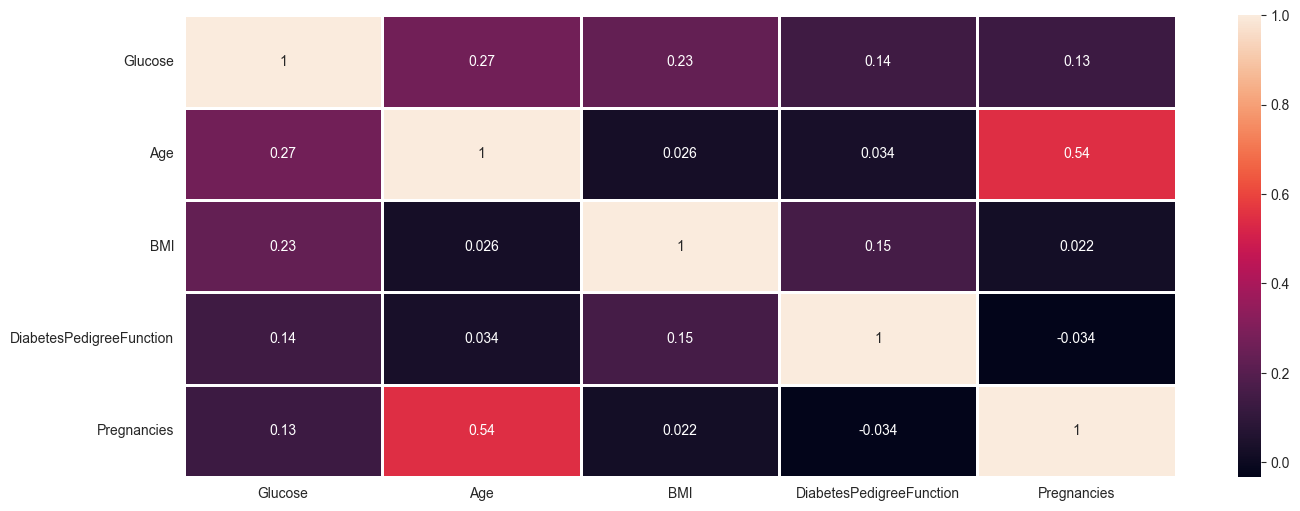

In [21]:
features = ['Glucose', 'Age', 'BMI', 'DiabetesPedigreeFunction', 'Pregnancies']

plt.figure(figsize = (16, 6))
sns.heatmap(df1[features].corr(), annot = True, linewidths = 2)
plt.show()

<a id="eda_key_features"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:110%; font-family:Arial; background-color:#666666; overflow:hidden"><b> 6. EDA of Key Features </b></div>

- **Key Predictors:** **Glucose**, **BMI**, and **Age** are strong predictors of diabetes, with diabetic cases tending to have higher values for each feature. The scatterplots highlight clusters of diabetic cases at higher levels for the former two features; for age, diabetes cases displayed no discernable pattern.

In [22]:
# Create a color mapping for the outcome
colors = {0: 'blue', 1: 'red'}

# Create the 3D scatter plot
trace = go.Scatter3d(
    x=df['Glucose'],  # Glucose levels on x-axis
    y=df['BMI'],      # BMI on y-axis
    z=df['Age'],      # Age on z-axis
    mode='markers',
    marker=dict(
        size=5,
        color=df['Outcome'].map(colors),  # Map outcome to specific colors
        opacity=0.7
    ),
    text=df['Outcome'].map({0: 'Non-diabetic', 1: 'Diabetic'}),  # Add labels for hover information
    name='Outcome'  # Name for the legend
)

# Define layout
layout = go.Layout(
    title='3D Scatter Plot of Glucose, BMI, and Age',
    scene=dict(
        xaxis=dict(title='Glucose'),
        yaxis=dict(title='BMI'),
        zaxis=dict(title='Age')
    ),
    margin=dict(l=0, r=0, b=0, t=50),  # Margins for better view
    width=800,  # Increase plot width
    height=600,  # Increase plot height
    legend=dict(
        title="Diabetes Outcome",
        itemsizing='constant',
        x=0.85,  # Position the legend to the right
        y=0.9,   # Position the legend to the top
        traceorder='normal',
    ),
    showlegend=False  # Show the legend
)

# Create the figure
fig = go.Figure(data=[trace], layout=layout)

# Display the plot
pyo.iplot(fig)

In [23]:
# Assuming 'df' is your DataFrame and contains the key features and the outcome
key_features = ['Glucose', 'BMI', 'Age']

# Generate all pairwise combinations of key features
feature_combinations = list(combinations(key_features, 2))
feature_combinations

[('Glucose', 'BMI'), ('Glucose', 'Age'), ('BMI', 'Age')]

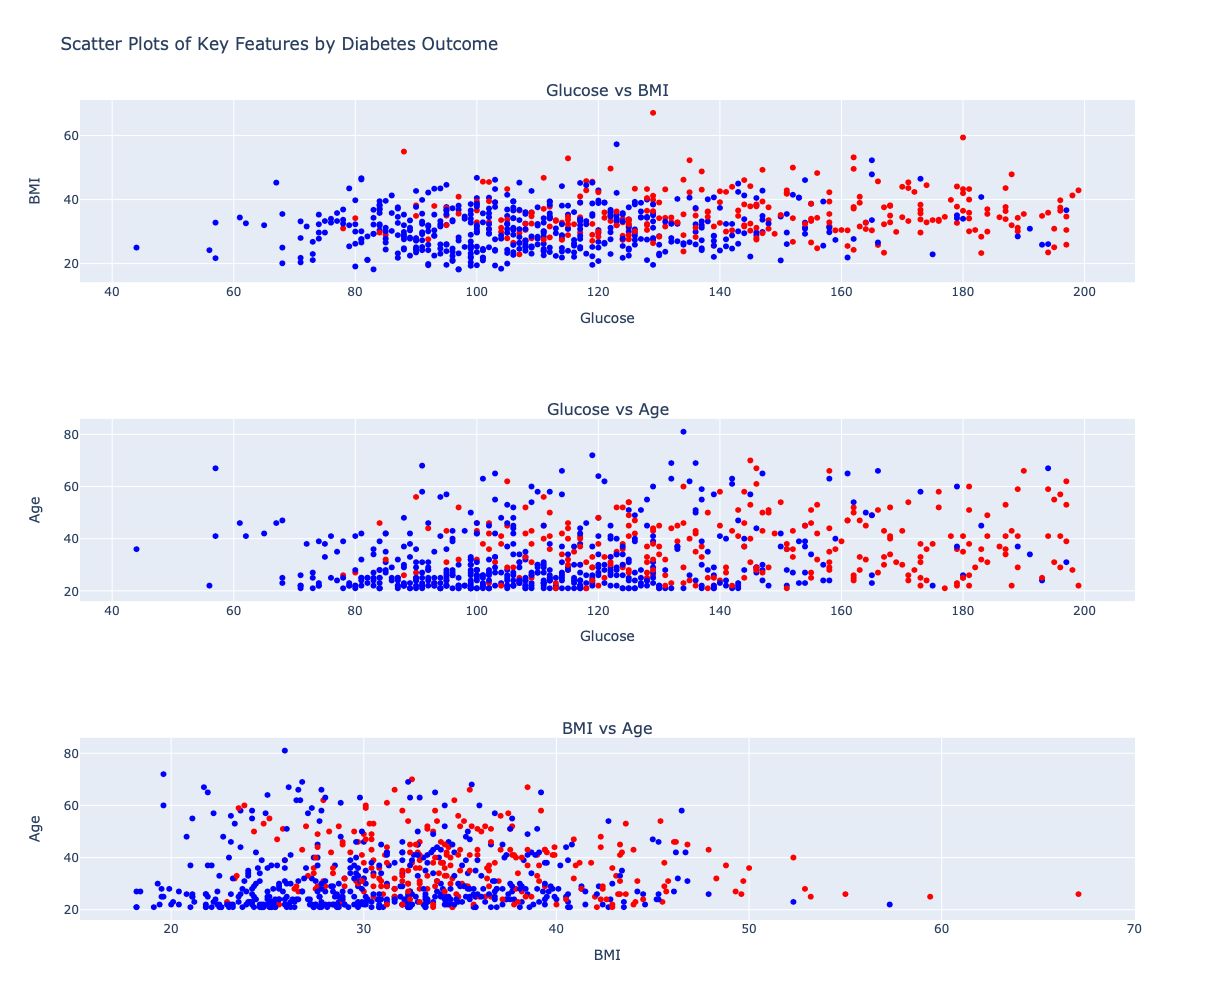

In [24]:
# Create subplots: 3 rows, 2 columns (to accommodate all 10 combinations)
fig = make_subplots(rows=3, cols=1, subplot_titles=[f'{x} vs {y}' for x, y in feature_combinations])

# Plot each combination
for idx, (x_feature, y_feature) in enumerate(feature_combinations):
    row = idx // 1 + 1  # Calculate the row position (1 to 5)
    col = idx % 1 + 1   # Calculate the column position (1 or 2)
    
    scatter = go.Scatter(
        x=df[x_feature],
        y=df[y_feature],
        mode='markers',
        marker=dict(color=df['Outcome'], colorscale=['blue', 'red'], showscale=False),
        name=f'{x_feature} vs {y_feature}',
        text=df['Outcome']
    )
    fig.add_trace(scatter, row=row, col=col)

    # Set axis titles for each subplot
    fig.update_xaxes(title_text=x_feature, row=row, col=col)
    fig.update_yaxes(title_text=y_feature, row=row, col=col)

# Update layout for the entire figure
fig.update_layout(
    title_text='Scatter Plots of Key Features by Diabetes Outcome',
    showlegend=False,  # Hide legend to avoid clutter
    height=1000,  # Set the height to accommodate 5 rows
    width=1000,   # Set the width for 2 columns
    template='plotly'
)

# Show the figure
fig.show()

<a id="model_building"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:110%; font-family:Arial; background-color:#666666; overflow:hidden"><b> 7. Model Building </b></div>

### Model Evaluation

In [25]:
key_features = ['Glucose', 'BMI', 'Age']

X = df[key_features]
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models to evaluate
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(class_weight='balanced', random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Define a scorer (F1-score is chosen for balanced assessment of precision and recall)
scorer = make_scorer(f1_score)

# Perform cross-validation and collect results
results = {}
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='f1', n_jobs=-1)
    results[model_name] = cv_scores
    print(f"{model_name}: Mean F1-score = {np.mean(cv_scores):.3f}, Std = {np.std(cv_scores):.3f}")

Logistic Regression: Mean F1-score = 0.682, Std = 0.065
Random Forest: Mean F1-score = 0.632, Std = 0.088
Gradient Boosting: Mean F1-score = 0.664, Std = 0.082
Support Vector Machine: Mean F1-score = 0.692, Std = 0.046
K-Nearest Neighbors: Mean F1-score = 0.637, Std = 0.080


### Cross-validation Results

In [26]:
# Summary of results
results_df = pd.DataFrame(results)
results_df.describe().loc[['count', 'mean', 'std']]

Logistic Regression  Random Forest  Gradient Boosting  \
count             5.000000       5.000000           5.000000   
mean              0.681502       0.632221           0.663799   
std               0.073033       0.098350           0.092151   

       Support Vector Machine  K-Nearest Neighbors  
count                5.000000             5.000000  
mean                 0.692363             0.636972  
std                  0.051068             0.089006

### Hyperparameter Tuning

In [27]:
# Define the parameter grid for SVM with more complexity
param_grid = {
    'C': [0.1, 1, 10, 100],             # Regularization parameter
    'kernel': ['rbf', 'poly'],          # Try non-linear kernels
    'gamma': [0.001, 0.01, 0.1, 'scale'],  # More gamma options
}

# Configure GridSearchCV with SVM
grid_search = GridSearchCV(SVC(class_weight='balanced', probability=True), param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the model with GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best F1 Score: {best_score:.3f}")

# Use the best model to predict on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best F1 Score: 0.708


<a id="risk"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:110%; font-family:Arial; background-color:#666666; overflow:hidden"><b> 8. Assessing Diabetes Risk </b></div>

The output probability provides a quantitative measure of risk. For instance, if the probability is 0.62, it indicates a 62% likelihood of being diabetic, which is more informative than a simple binary outcome.

With our trained SVM model on hand, we estimated the of a person of **Age 54**, **height 178 cm**, **weight 96 kg**, and **glucose levels of 125 mg/dL** getting diabetes. Click the Predict Risk button below to see the model estimation of diabetes risk.

Age: 54
Height: 178 cm
Weight: 96 kg
Glucose: 125 mg/dL
BMI: 30.30

Probability of being diabetic: 62.20%
Assessment: ELEVATED RISK


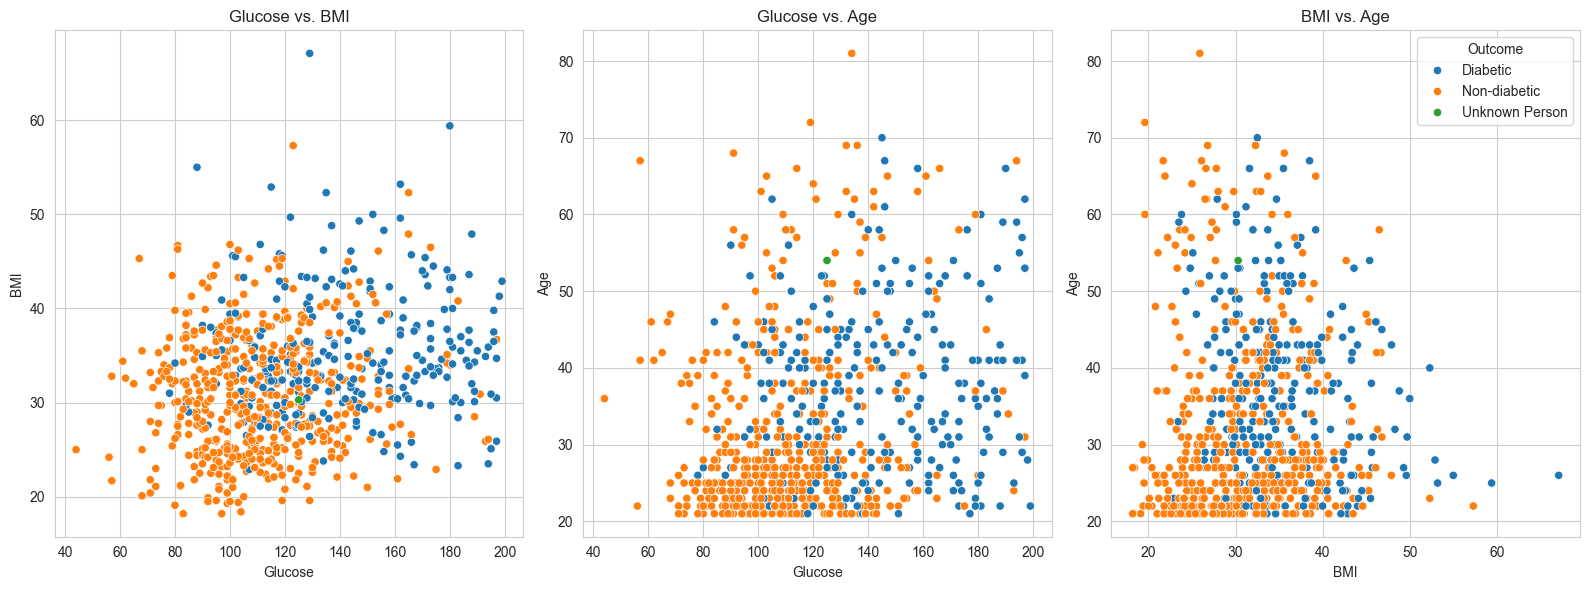

In [31]:
tmp = df1.copy()
tmp = tmp[['Glucose','BMI','Age','Outcome']]
tmp['Outcome'] = tmp['Outcome'].map({0: 'Non-diabetic', 1: 'Diabetic'})

height_cm = 178
weight_kg = 96
age = 54
glucose = 125
height_m = height_cm / 100  # Convert height to meters
bmi = weight_kg / (height_m ** 2)

# Prepare the input feature array
input_data = np.array([[glucose, bmi, age]])

# Scale the input data using the trained StandardScaler
input_data_scaled = scaler.transform(input_data)

# Predict the probability of diabetes
probabilities = best_model.predict_proba(input_data_scaled)
probability_of_high_risk = probabilities[0][1]  # Probability of being in the positive class

# Display the prediction result
print(f"Age: {age}")
print(f"Height: {height_cm} cm")
print(f"Weight: {weight_kg} kg")

print(f"Glucose: {glucose} mg/dL")
print(f"BMI: {bmi:.2f}")

print("")
print(f"Probability of being diabetic: {probability_of_high_risk * 100:.2f}%")

print(f"Assessment: {h.assess_risk(probability_of_high_risk)} RISK")


new_obs = pd.DataFrame([{'Glucose': glucose, 'BMI': bmi, 'Age': age, 'Outcome': 'Unknown Person'}])
tmp = pd.concat([tmp, new_obs], ignore_index = True)

fig, axs = plt.subplots(1, 3, figsize = (16, 6))
sns.scatterplot(tmp, x = 'Glucose', y = 'BMI', hue = 'Outcome', ax=axs[0])
sns.scatterplot(tmp, x = 'Glucose', y = 'Age', hue = 'Outcome', ax=axs[1])
sns.scatterplot(tmp, x = 'BMI', y = 'Age', hue = 'Outcome', ax=axs[2])

axs[0].set_title("Glucose vs. BMI")
axs[1].set_title("Glucose vs. Age")
axs[2].set_title("BMI vs. Age")

axs[0].get_legend().remove()
axs[1].get_legend().remove()

plt.tight_layout()

<a id="conclusion"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:110%; font-family:Arial; background-color:#666666; overflow:hidden"><b> 9. Conclusion </b></div>

Thank you for reading my report to the end! If you learned something new, please upvote my work. Good luck on your learning journey!